---
title: "DSAN 6300 Mini Project Visualizations"
author: "Ishka Gobin"
format:
  html:
    toc: true
    embed-resources: true
    df-print: kable
    link-external-newwindow: true
    link-external-icon: true
---

# Objective

Investigate U.S. airline performance during November 2023, using data from the Bureau of Transportation Statistics, to better understand operational efficiency, reliability, and patterns influencing delays and cancellations.

# Key Questions

1. Which airlines and airports are the most reliable?
2. Which struggle with delays or cancellations?
3. How do broader operational patterns (like weekdays or seasonal changes) shape flight performance?


## Question 1

Find maximal departure delay in minutes for each airline. Sort results from smallest to largest maximum delay. Output airline names and values of the delay.

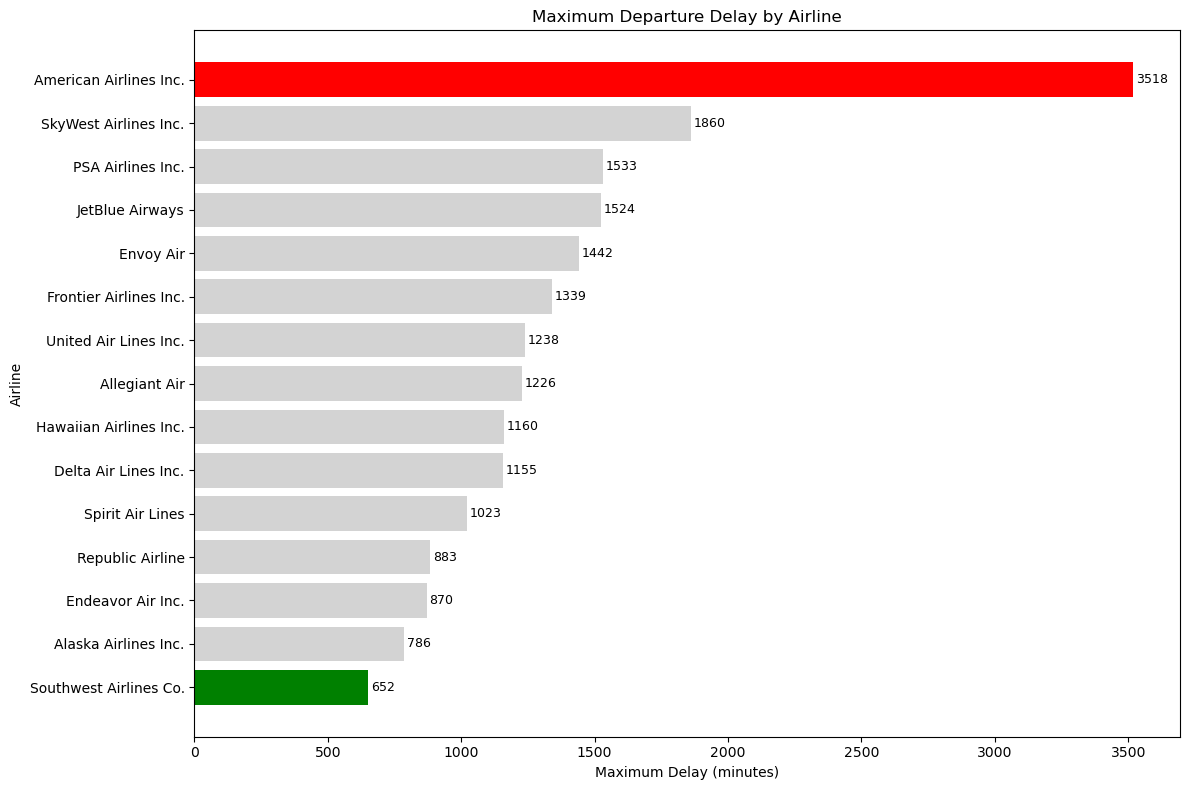

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("miniproject_ig294_problem1.csv")

# Sort from smallest to largest maximum delay
df = df.sort_values("Maximum_Delay")

# Identify smallest & largest airlines
min_airline = df.iloc[0]["Airline_Name"]
max_airline = df.iloc[-1]["Airline_Name"]

colors = []
for airline in df["Airline_Name"]:
    if airline == min_airline:
        colors.append("green")   # smallest delay highlight
    elif airline == max_airline:
        colors.append("red")     # largest delay highlight
    else:
        colors.append("lightgray")

plt.figure(figsize=(12, 8))
bars = plt.barh(df["Airline_Name"], df["Maximum_Delay"], color=colors)

# Add plain numeric labels (no "min")
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
             f"{int(width)}", va="center", fontsize=9)

plt.xlabel("Maximum Delay (minutes)")
plt.ylabel("Airline")
plt.title("Maximum Departure Delay by Airline")
plt.tight_layout()
plt.savefig("Problem 1.png")
plt.show()




## Question 2

Find maximal early departures in minutes for each airline. Sort results from largest to smallest. Output airline names.

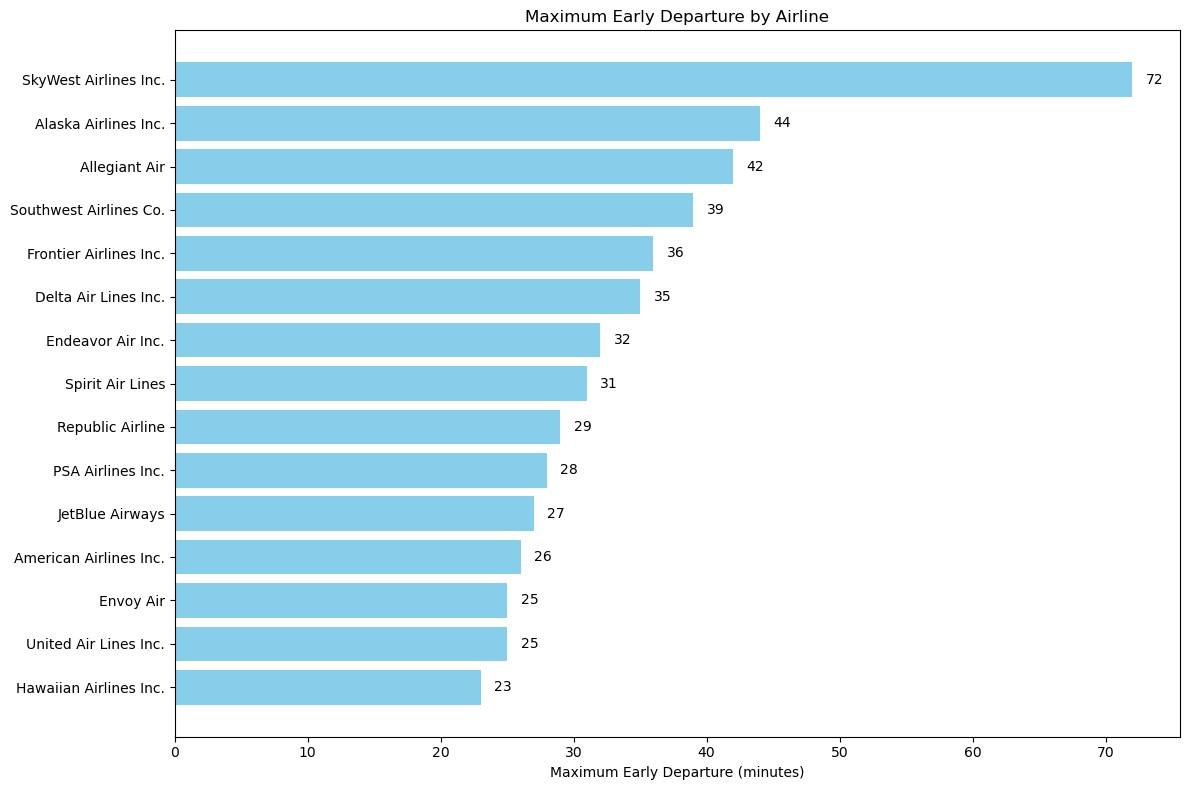

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/Users/ishika/Desktop/MS/DSAN 6300/Mini Project/MiniProject/miniproject_ig294_problem2.csv")
df_sorted = df.sort_values(by="Max_Early_Departure", ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(df_sorted['Airline_Name'], df_sorted['Max_Early_Departure'], 
                color='skyblue')

plt.gca().invert_yaxis()

for i, (value, airline) in enumerate(zip(df_sorted['Max_Early_Departure'], 
                                         df_sorted['Airline_Name'])):
    plt.text(value + 1, i, str(value), va='center')  # <-- SMALL OFFSET (1)

plt.xlabel("Maximum Early Departure (minutes)")
plt.title("Maximum Early Departure by Airline")
plt.tight_layout()
plt.savefig("Problem 2.png")
plt.show()


## Question 3

Rank days of the week by the number of flights performed by all airlines on that day (1 is the busiest). Output the day of the week names, number of flights and ranks in the rank increasing order

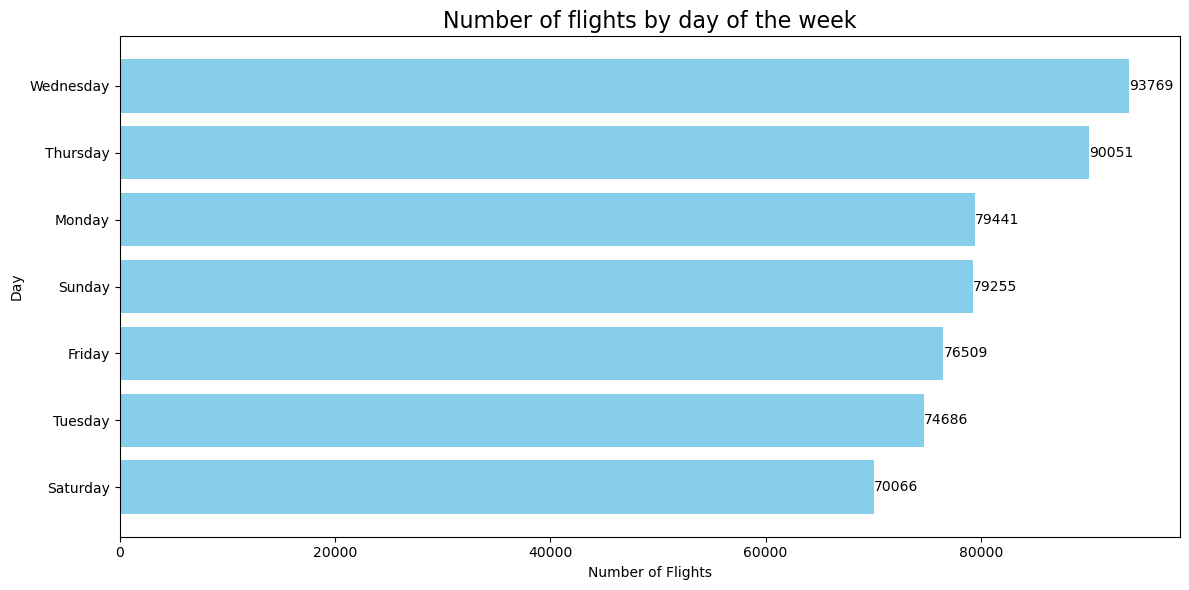

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/Users/ishika/Desktop/MS/DSAN 6300/Mini Project/MiniProject/miniproject_ig294_problem3.csv')

# Ensure ordered by rank
df = df.sort_values('Day_Rank')

plt.figure(figsize=(12, 6))
bars = plt.barh(df['Day_Name'], df['Total_Flights'], color='skyblue')

# Add labels
for bar, value, rank in zip(bars, df['Total_Flights'], df['Day_Rank']):
    plt.text(bar.get_width() + 20,      # small offset to the right
             bar.get_y() + bar.get_height() / 2,
             f'{value}',
             va='center')

plt.xlabel('Number of Flights')
plt.ylabel('Day')
plt.title('Number of flights by day of the week',fontsize=16)
plt.gca().invert_yaxis()  # highest rank at top
plt.tight_layout()
plt.savefig("Problem 3.png")
plt.show()



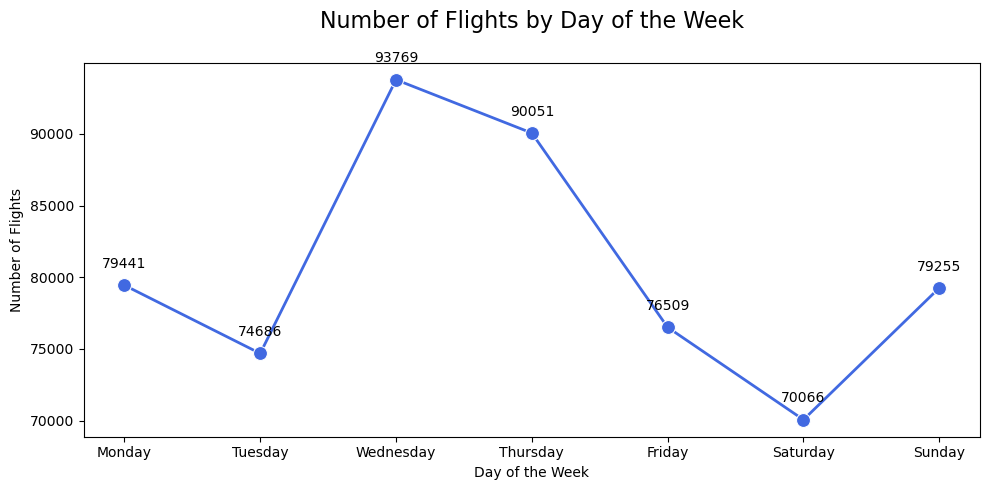

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV data
df = pd.read_csv("/Users/ishika/Desktop/MS/DSAN 6300/Mini Project/MiniProject/miniproject_ig294_problem3.csv")

# Reorder Day_Name from Monday to Sunday
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["Day_Name"] = pd.Categorical(df["Day_Name"], categories=day_order, ordered=True)
df = df.sort_values("Day_Name")


# 1. Line plot with markers
plt.figure(figsize=(10,5))
sns.lineplot(
    x="Day_Name",
    y="Total_Flights",
    data=df,
    marker="o",
    markersize=10,
    linewidth=2,
    color="royalblue"
)

# Annotate points
for i, row in df.iterrows():
    plt.text(row["Day_Name"], row["Total_Flights"] + 1000, 
             f'{row["Total_Flights"]}', 
             ha='center', va='bottom', fontsize=10)

plt.title("Number of Flights by Day of the Week", fontsize=16)
plt.title("Number of Flights by Day of the Week", fontsize=16, pad=25)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Flights")
plt.grid(False)
plt.tight_layout()
plt.savefig("Problem 3-scatterplot.png")
plt.show()




## Question 4

Find the airport that has the highest average departure delay among all airports. Consider 0 minutes delay for flights that departed early. Output one line of results: the airport name, code, and average delay

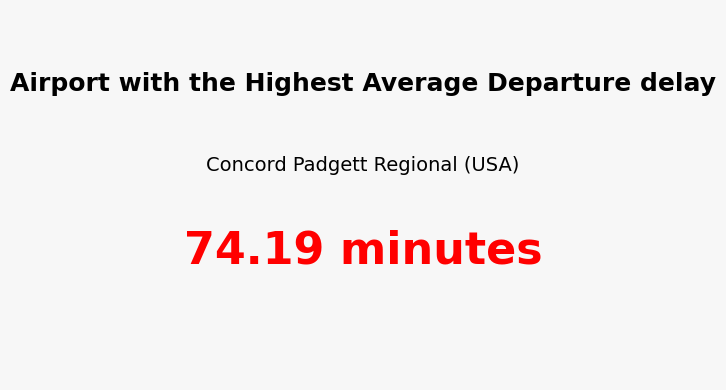

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/Users/ishika/Desktop/MS/DSAN 6300/Mini Project/MiniProject/miniproject_ig294_problem4.csv")

df['airport_name_modif'] = df['airport_name'].apply(lambda x: x.split(':')[-1].strip())

airport = df.loc[0, "airport_name_modif"]
code = df.loc[0, "airport_code"]
delay = df.loc[0, "average_departure_delay"]

plt.figure(figsize=(8, 4))
plt.axis('off')

# KPI card background
plt.gca().set_facecolor("#f7f7f7")
plt.gcf().patch.set_facecolor("#f7f7f7")

# Title
plt.text(0.5, 0.8, "Airport with the Highest Average Departure delay", 
         ha='center', va='center', fontsize=18, fontweight='bold')

# Airport name
plt.text(0.5, 0.58, f"{airport} ({code})",
         ha='center', va='center', fontsize=14)

# KPI Metric
plt.text(0.5, 0.35, f"{delay:.2f} minutes",
         ha='center', va='center', fontsize=32, color="red", fontweight="bold")

# # Label
# plt.text(0.5, 0.17, "Average Departure Delay", 
#          ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.savefig("Problem 4.png")
plt.show()


import pandas as p




## Question 5 

For each airline find an airport where it has the highest average departure delay. Output an airline name, a name of the airport that has the highest average delay, and the value of that average delay.

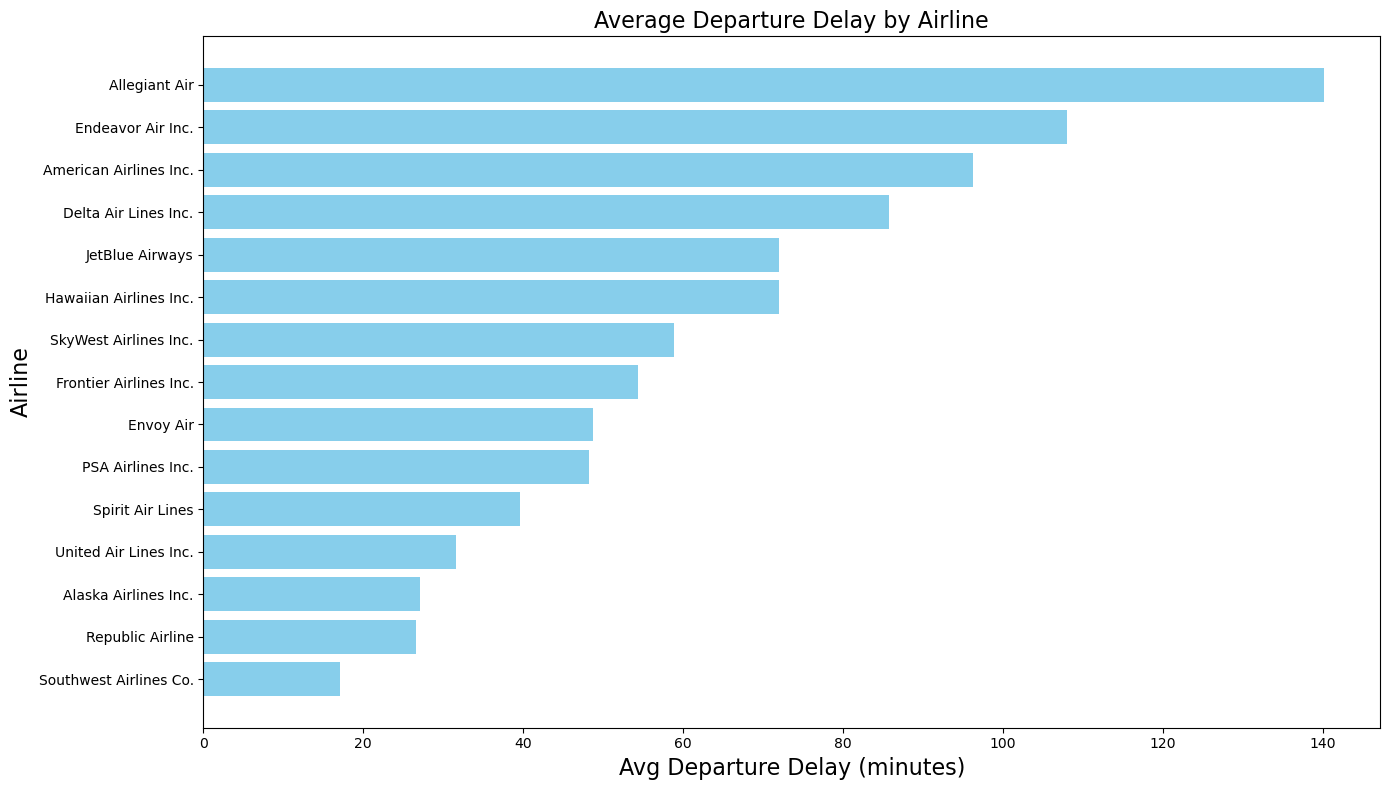

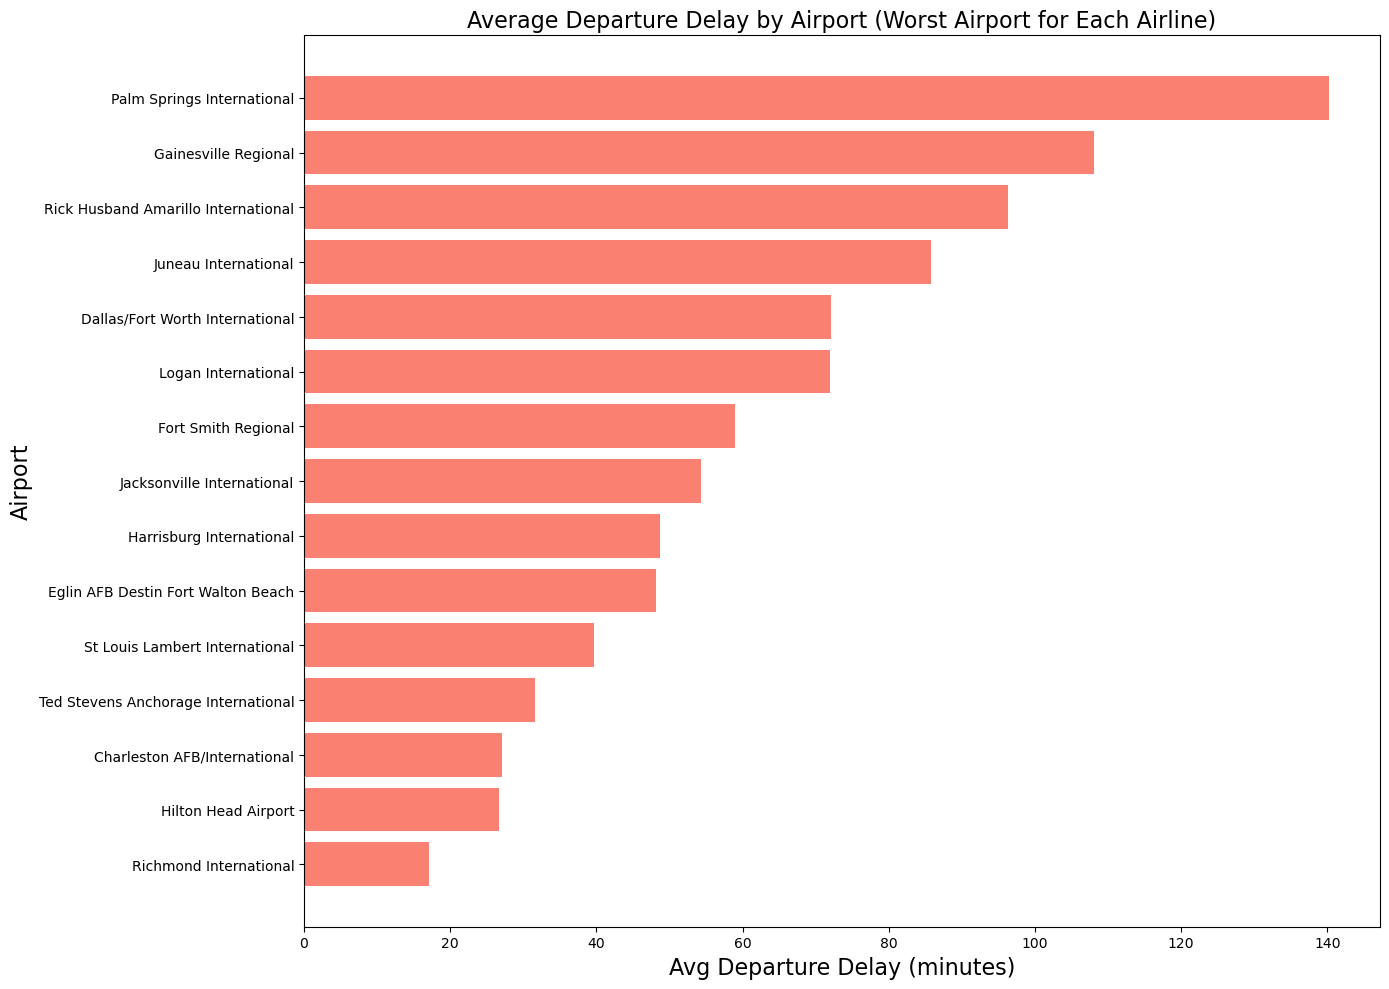

In [92]:


import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV
df = pd.read_csv("/Users/ishika/Desktop/MS/DSAN 6300/Mini Project/MiniProject/miniproject_ig294_problem5.csv")
# Columns expected: Airline_Name, Airport_Name, Average_Departure_Delay

# -------------------------------
# PLOT 1 — Average Delay by Airline
# -------------------------------

airline_delay = (
    df.groupby("Airline_Name")["Average_Departure_Delay"]
    .mean()
    .sort_values()
)

plt.figure(figsize=(14, 8))
plt.barh(airline_delay.index, airline_delay.values, color="skyblue")
plt.title("Average Departure Delay by Airline", fontsize=16)
plt.xlabel("Avg Departure Delay (minutes)",fontsize=16)
plt.ylabel("Airline",fontsize=16)
plt.tight_layout()
plt.savefig("Problem 5a.png")
plt.show()

# -------------------------------
# PLOT 2 — Average Delay by Airport
# -------------------------------

airport_delay = (
    df.groupby("Airport_Name")["Average_Departure_Delay"]
    .mean()
    .sort_values()
)

plt.figure(figsize=(14, 10))
plt.barh(airport_delay.index, airport_delay.values, color="salmon")
plt.title("Average Departure Delay by Airport (Worst Airport for Each Airline)", fontsize=16)
plt.xlabel("Avg Departure Delay (minutes)", fontsize=16)
plt.ylabel("Airport",fontsize=16)
plt.tight_layout()
plt.savefig("Problem 5b.png")
plt.show()





## Question 6 

Check if your dataset has any canceled flights.
If it does, what was the most frequent reason for each departure airport? Output airport name, the most frequent reason, and the number of cancelations for that reason

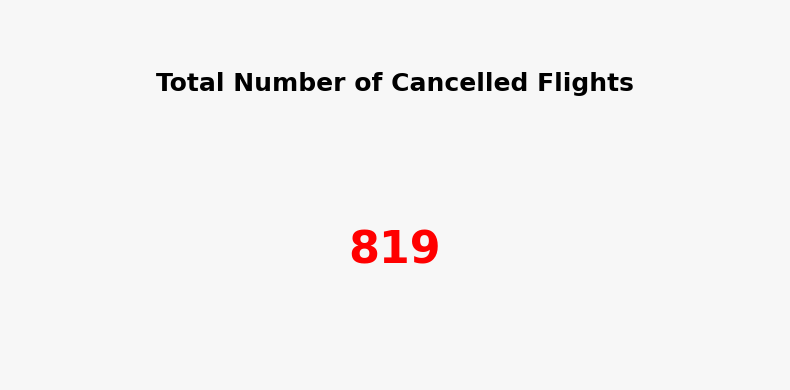

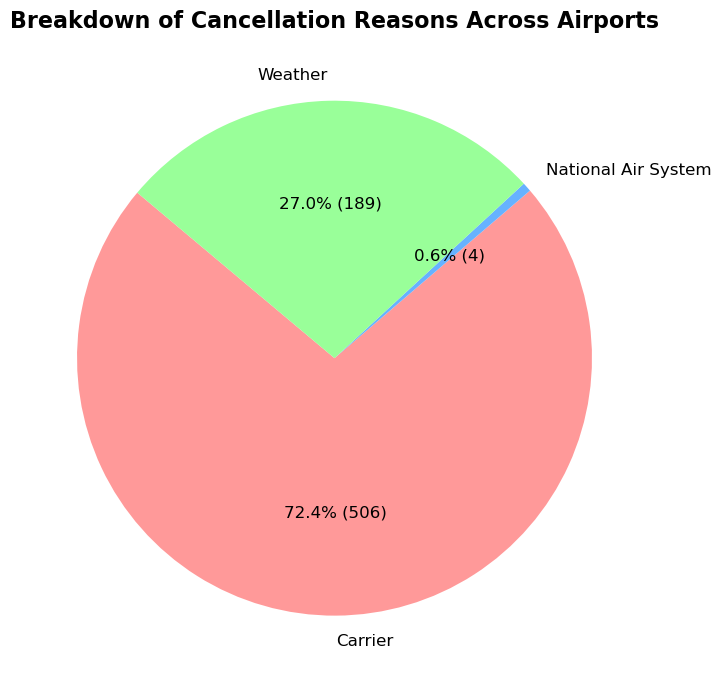

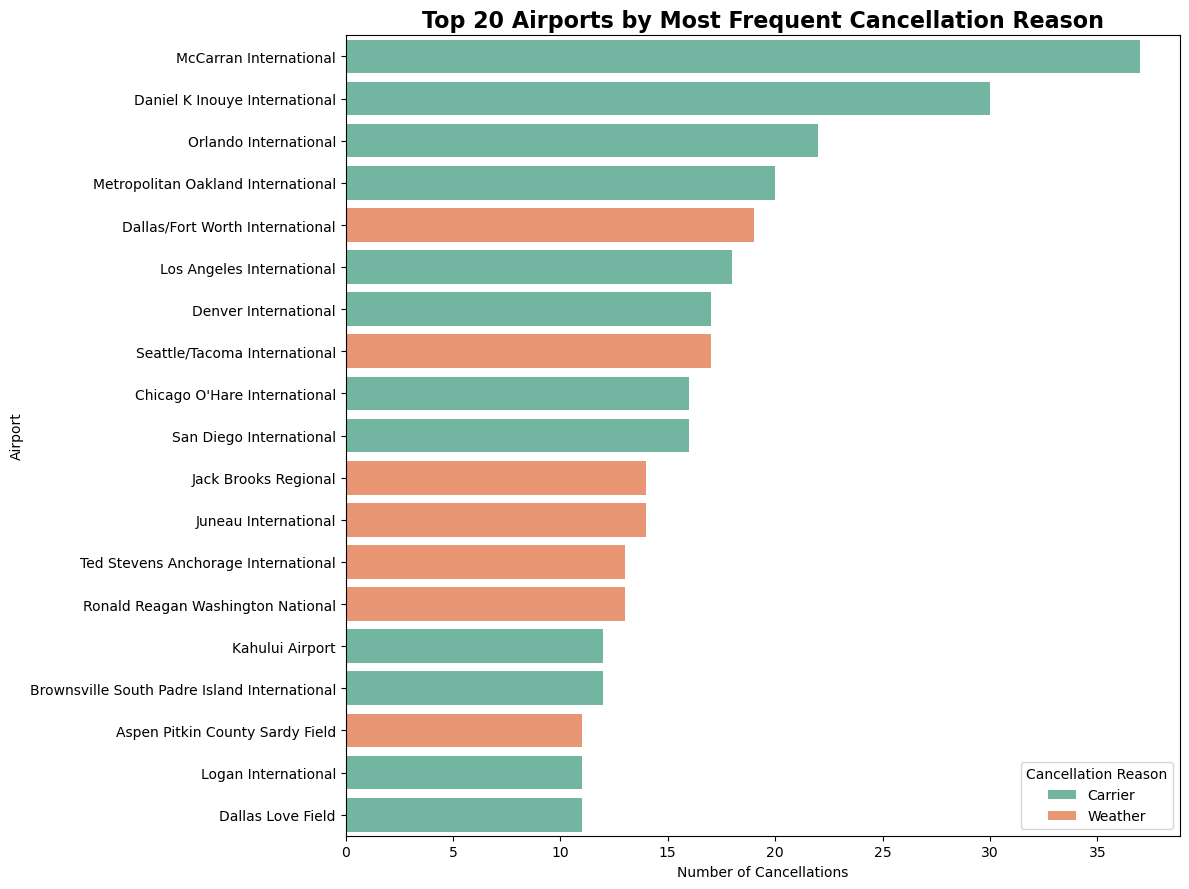

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read CSV with single column: Cancelled_Flights
df = pd.read_csv("/Users/ishika/Desktop/MS/DSAN 6300/Mini Project/MiniProject/miniproject_ig294_problem6a.csv")

# Get the total number of cancelled flights (first row)
cancelled_flights = df.loc[0, "Cancelled_Flights"]

plt.figure(figsize=(8, 4))
plt.axis('off')

# KPI card background
plt.gca().set_facecolor("#f7f7f7")
plt.gcf().patch.set_facecolor("#f7f7f7")

# Title
plt.text(0.5, 0.8, "Total Number of Cancelled Flights",
         ha='center', va='center', fontsize=18, fontweight='bold')

# # Subtitle / context
# plt.text(0.5, 0.58, "Total number of cancelled flights",
#          ha='center', va='center', fontsize=14)

# KPI Metric (big number)
plt.text(0.5, 0.35, f"{cancelled_flights:,}",
         ha='center', va='center', fontsize=32, color="red", fontweight="bold")

plt.tight_layout()
plt.savefig("Problem 6 KPI.png")
plt.show()

# pie chart of cancellation reasons 
import pandas as pd
import matplotlib.pyplot as plt

# Load your cancellations CSV
df = pd.read_csv("/Users/ishika/Desktop/MS/DSAN 6300/Mini Project/MiniProject/miniproject_ig294_problem6b.csv")

# Group by cancellation reason
reason_summary = df.groupby("Most_Frequent_Reason")["Number_Of_Cancellations"].sum()

# Nice colors
colors = ["#FF9999", "#66B2FF", "#99FF99", "#FFCC99", "#C2C2F0"]

plt.figure(figsize=(10, 7))

# Custom autopct function to show % and raw count
def autopct_with_counts(pct):
    total = reason_summary.sum()
    count = int(round(pct * total / 100.0))
    return f"{pct:.1f}% ({count})"

# Pie chart
plt.pie(
    reason_summary,
    labels=reason_summary.index,
    autopct=autopct_with_counts,
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

plt.title("Breakdown of Cancellation Reasons Across Airports", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.savefig("Problem 6 pie chart.png")
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("miniproject_ig294_problem6b.csv")

# Pivot: rows = airport, columns = reason, values = num cancellations
pivot = (
    df.pivot_table(
        index="Airport_Name",
        columns="Most_Frequent_Reason",
        values="Number_Of_Cancellations",
        aggfunc="sum",
        fill_value=0
    )
)

pivot["Total_Cancellations"] = pivot.sum(axis=1)
pivot = pivot.sort_values("Total_Cancellations", ascending=True)
pivot = pivot.drop(columns="Total_Cancellations")


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load file
df = pd.read_csv("/Users/ishika/Desktop/MS/DSAN 6300/Mini Project/MiniProject/miniproject_ig294_problem6b.csv")



top_airports = df.sort_values("Number_Of_Cancellations", ascending=False).head(20)

# --- Plot ---
plt.figure(figsize=(12, 9))
sns.barplot(
    data=top_airports,
    x="Number_Of_Cancellations",
    y="Airport_Name",
    hue="Most_Frequent_Reason",
    dodge=False,                   # ensures one bar per airport
    palette="Set2"
)

plt.title("Top 20 Airports by Most Frequent Cancellation Reason", fontsize=16, fontweight="bold")
plt.xlabel("Number of Cancellations")
plt.ylabel("Airport")
plt.legend(title="Cancellation Reason")
plt.tight_layout()
plt.savefig("Problem 6 bar chart.png")
plt.show()







## Question 7

Build a report that for each day output average number of flights over the preceding 3 days.

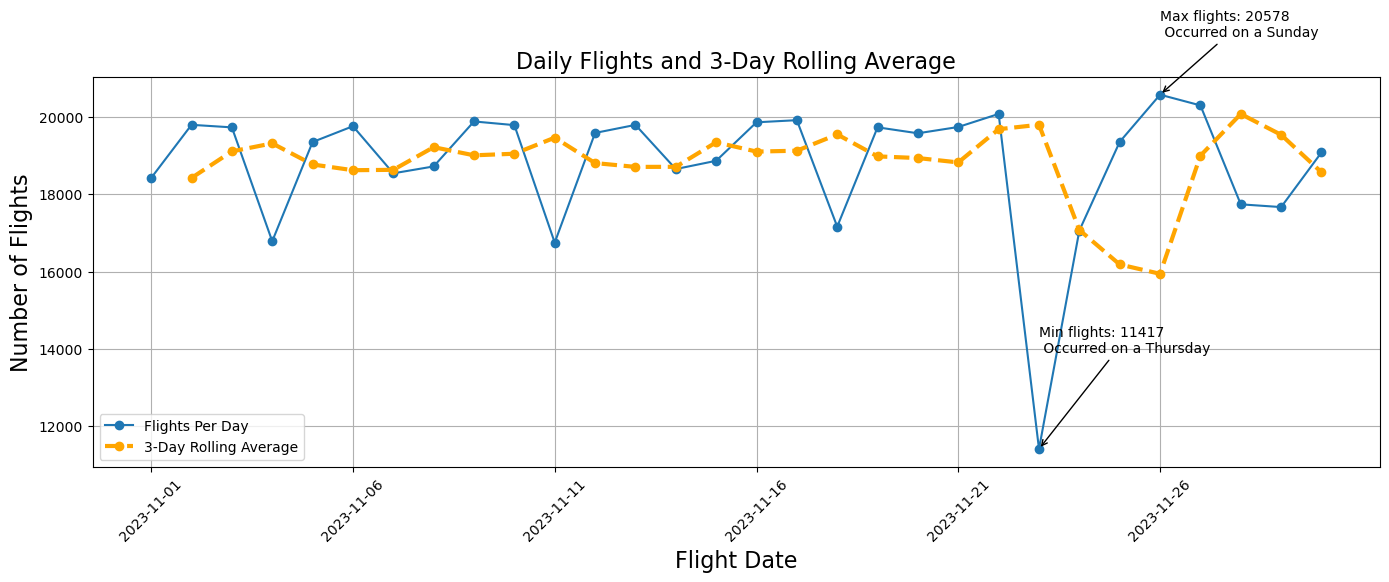

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/ishika/Desktop/MS/DSAN 6300/Mini Project/MiniProject/miniproject_ig294_problem7.csv")

plt.figure(figsize=(14,6))

# Plot total flights
plt.plot(df["FlightDate"], df["Flights_Per_Day"], 
         label="Flights Per Day", marker="o")

# Plot rolling average (dashed orange)
plt.plot(df["FlightDate"], df["Avg_Flights_Preceding_3_Days"], 
         label="3-Day Rolling Average", marker="o",
         linewidth=3, linestyle="--", color="orange")

plt.title("Daily Flights and 3-Day Rolling Average", fontsize=16)
plt.xlabel("Flight Date", fontsize=16)
plt.ylabel("Number of Flights",fontsize=16)

# Show every 5th tick on the x-axis
plt.xticks(df["FlightDate"][::5], rotation=45)


# Max flights
max_idx = df["Flights_Per_Day"].idxmax()
plt.annotate(
    f"Max flights: {df['Flights_Per_Day'][max_idx]}\n Occurred on a Sunday",
    xy=(df["FlightDate"][max_idx], df["Flights_Per_Day"][max_idx]),
    xytext=(df["FlightDate"][max_idx], df["Flights_Per_Day"][max_idx] + 1500),
    arrowprops=dict(arrowstyle="->")
)

# Min flights
min_idx = df["Flights_Per_Day"].idxmin()
plt.annotate(
    f"Min flights: {df['Flights_Per_Day'][min_idx]}\n Occurred on a Thursday",
    xy=(df["FlightDate"][min_idx], df["Flights_Per_Day"][min_idx]),
    xytext=(df["FlightDate"][min_idx], df["Flights_Per_Day"][min_idx] + 2500),
    arrowprops=dict(arrowstyle="->")
)


plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Problem 7")
plt.show()


